# Practice Project - 2    (MUSHROOM)

In [1]:
# Importing some necessary libraries


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Upload the dataset

data = pd.read_csv(r"C:\Users\ADMIN\Downloads\mushrooms.csv")
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
print("Shape of the dataset -->",data.shape)

Shape of the dataset --> (8124, 23)


In [4]:
# finding the null values if any...

data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [5]:
# separate the features and label

y_label = data["class"]
x_label = data.drop("class",axis=1)

In [6]:
# check the value count of target column

y_label.value_counts()

e    4208
p    3916
Name: class, dtype: int64

<AxesSubplot:xlabel='class', ylabel='count'>

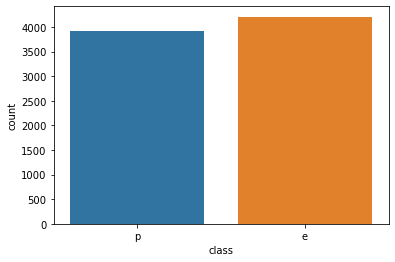

In [7]:
# visualizing the values of label using countplot

sns.countplot(y_label)

<AxesSubplot:ylabel='class'>

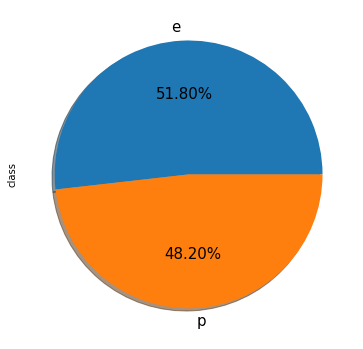

In [8]:
# visualizing the values of label using pie plot

y_label.value_counts().plot.pie(figsize = (6,10),autopct = "%1.2f%%", shadow=True, fontsize = 15)

In [9]:
# convert category values to continuous values

y_label = data["class"].replace({"e":0, "p":1})

In [10]:
y_label.value_counts()

0    4208
1    3916
Name: class, dtype: int64

### Binary Encoding

In [11]:
# Importing some necessary libraries

from category_encoders import BinaryEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [12]:
bin_enc = BinaryEncoder()

In [13]:
x_label = bin_enc.fit_transform(x_label)

In [14]:
# shape after applying Binary Encoder

print("Shape after aplying Binary Encoder -->",x_label.shape)

Shape after aplying Binary Encoder --> (8124, 76)


### Visualizing the relationship between features and label

In [15]:
cor = x_label.corr()
cor.shape

(76, 76)

<AxesSubplot:>

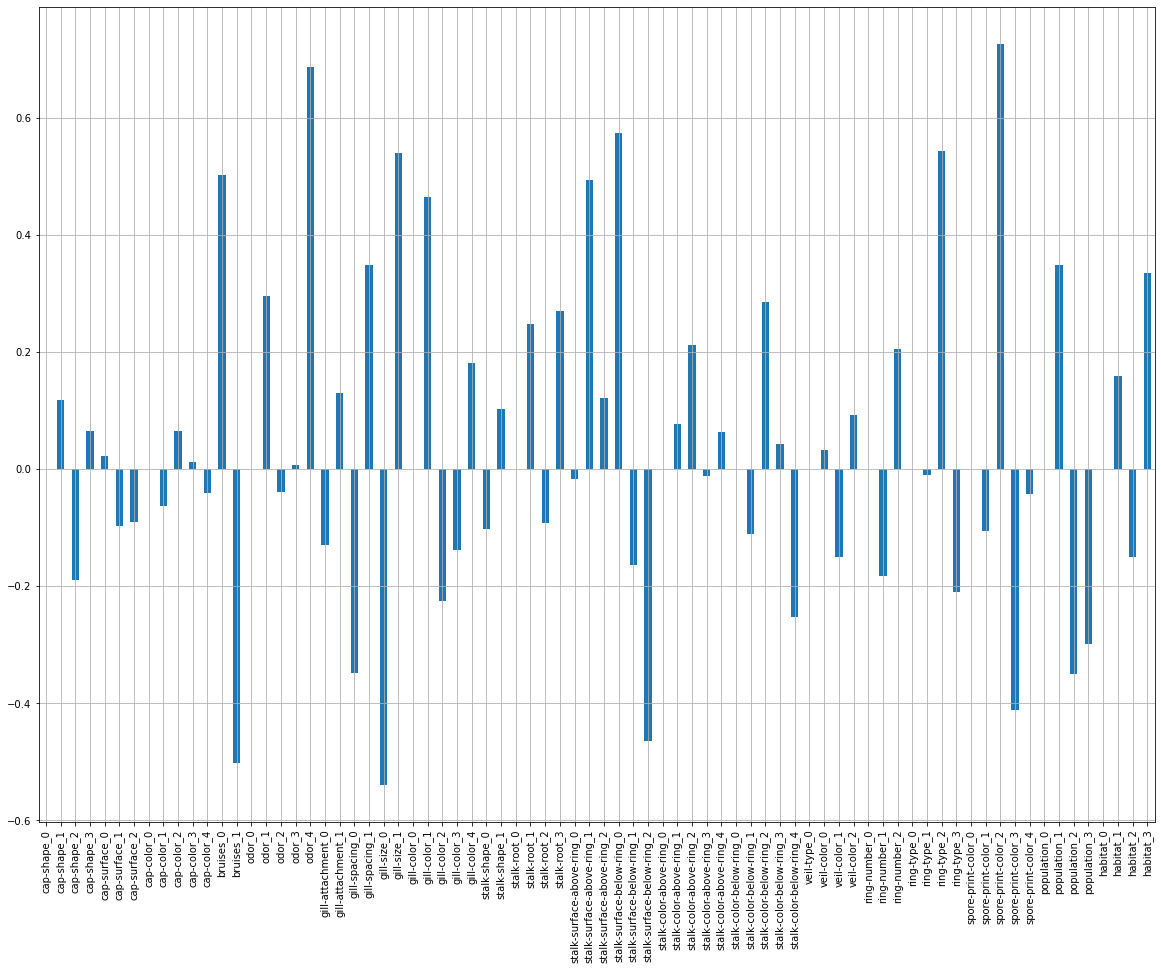

In [16]:
x_label.corrwith(y_label).plot(kind='bar',grid=True, figsize = (20,15))

<AxesSubplot:>

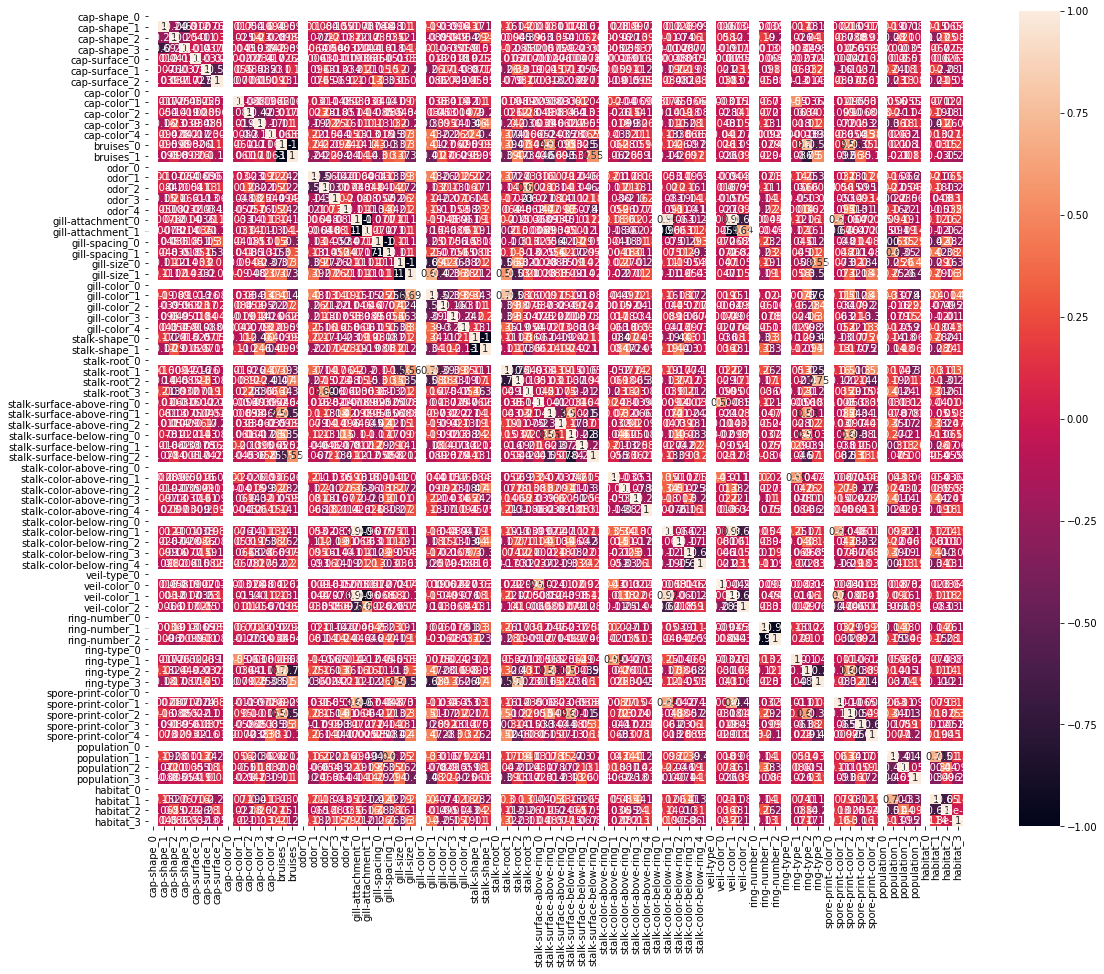

In [17]:
plt.figure (figsize = (20,15))
sns.heatmap(cor,cbar=True, square=True, annot=True)

### Importong Necessary Classification Model Libraries

In [18]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [19]:
# Decision Tree Classifier

aucMAX = 0
stateMAX = 0

for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x_label, y_label, test_size = 0.25, random_state = i)
    DTC = DecisionTreeClassifier()
    DTC.fit(x_train,y_train)
    y_pred = DTC.predict(x_test)
    auc = accuracy_score(y_pred, y_test)
    if auc > aucMAX:
        aucMAX = auc
        stateMAX = i
print("Best Accuracy is -->",aucMAX, "Best Random State is -->",stateMAX)
print("Cross Val Score : ",cross_val_score(DTC,x_label,y_label,cv=5).mean())
print("Average Score is : ",(aucMAX+(cross_val_score(DTC,x_label,y_label,cv=5).mean()))/2)

Best Accuracy is --> 1.0 Best Random State is --> 1
Cross Val Score :  0.9044528988253127
Average Score is :  0.9556747252747253


In [20]:
x_train,x_test,y_train,y_test = train_test_split(x_label,y_label,test_size=0.25,random_state=stateMAX)

In [21]:
# Random Forest Classifier

RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)
y_pred = RFC.predict(x_test)
acc = classification_report(y_test,y_pred)
print(acc)
print("Cross Val Score : ",cross_val_score(RFC,x_label,y_label,cv=5).mean())
print("Average Score is : ",(aucMAX+(cross_val_score(RFC,x_label,y_label,cv=5).mean()))/2)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1020
           1       1.00      1.00      1.00      1011

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031

Cross Val Score :  0.9088863963622584
Average Score is :  0.9513028040924593


In [22]:
# Ada Boost Classifier

ABC = AdaBoostClassifier()
ABC.fit(x_train,y_train)
y_pred = ABC.predict(x_test)
acc = classification_report(y_test,y_pred)
print(acc)
print("Cross Val Score : ",cross_val_score(ABC,x_label,y_label,cv=5).mean())
print("Average Score is : ",(aucMAX+(cross_val_score(ABC,x_label,y_label,cv=5).mean()))/2)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1020
           1       1.00      0.99      0.99      1011

    accuracy                           0.99      2031
   macro avg       0.99      0.99      0.99      2031
weighted avg       0.99      0.99      0.99      2031

Cross Val Score :  0.8936215990905646
Average Score is :  0.9468107995452824


In [23]:
# Bagging Classifier

BC = BaggingClassifier()
BC.fit(x_train,y_train)
y_pred = BC.predict(x_test)
acc = classification_report(y_test,y_pred)
print(acc)
print("Cross Val Score : ",cross_val_score(BC,x_label,y_label,cv=5).mean())
print("Average Score is : ",(aucMAX+(cross_val_score(BC,x_label,y_label,cv=5).mean()))/2)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1020
           1       1.00      1.00      1.00      1011

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031

Cross Val Score :  0.9219395225464192
Average Score is :  0.9579530503978779


In [24]:
# Gradient Boosting Classifier

GBC = GradientBoostingClassifier()
GBC.fit(x_train,y_train)
y_pred = GBC.predict(x_test)
acc = classification_report(y_test,y_pred)
print(acc)
print("Cross Val Score : ",cross_val_score(GBC,x_label,y_label,cv=5).mean())
print("Average Score is : ",(aucMAX+(cross_val_score(GBC,x_label,y_label,cv=5).mean()))/2)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1020
           1       1.00      1.00      1.00      1011

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031

Cross Val Score :  0.9054381205001896
Average Score is :  0.9532116710875332


In [25]:
# K-Neighbors Classifier

KNC = KNeighborsClassifier()
KNC.fit(x_train,y_train)
y_pred = KNC.predict(x_test)
acc = classification_report(y_test,y_pred)
print(acc)
print("Cross Val Score : ",cross_val_score(KNC,x_label,y_label,cv=5).mean())
print("Average Score is : ",(aucMAX+(cross_val_score(KNC,x_label,y_label,cv=5).mean()))/2)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1020
           1       1.00      1.00      1.00      1011

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031

Cross Val Score :  0.9294521409624859
Average Score is :  0.9647260704812429


In [26]:
# Logistic Regression Classifier

LR = LogisticRegression()
LR.fit(x_train,y_train)
y_pred = LR.predict(x_test)
acc = classification_report(y_test,y_pred)
print(acc)
print("Cross Val Score : ",cross_val_score(LR,x_label,y_label,cv=5).mean())
print("Average Score is : ",(aucMAX+(cross_val_score(LR,x_label,y_label,cv=5).mean()))/2)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1020
           1       1.00      1.00      1.00      1011

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031

Cross Val Score :  0.877243956043956
Average Score is :  0.938621978021978


### It's clear that K-Neighbors Classifier Model has best score : 0.9647
### Now I am going to use HyperParameter

In [27]:
from sklearn.model_selection import GridSearchCV

In [28]:
param_grid = {'algorithm' : ["kd_tree", "brute"],
             'leaf_size' : [15,18,20],
             "n_neighbors" : [3,5,7,13],
              "p" : [1,2]
             }

In [29]:
grid_search = GridSearchCV(estimator=KNC,param_grid=param_grid)

In [30]:
grid_search.fit(x_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['kd_tree', 'brute'],
                         'leaf_size': [15, 18, 20],
                         'n_neighbors': [3, 5, 7, 13], 'p': [1, 2]})

In [31]:
grid_search.best_params_

{'algorithm': 'kd_tree', 'leaf_size': 15, 'n_neighbors': 3, 'p': 1}

In [32]:
Final_Model = KNeighborsClassifier(algorithm='kd_tree', leaf_size = 15, n_neighbors = 3,p=1)
Final_Model.fit(x_train,y_train)
y_pred= Final_Model.predict(x_test)
acc = accuracy_score(y_test,y_pred)
print(acc*100)

100.0


## Saving The Model

In [33]:
import joblib
joblib.dump(Final_Model,"FinalModel.pkl")

['FinalModel.pkl']

## Loading The Model

In [34]:
model = joblib.load("FinalModel.pkl")
model.predict(x_label)
pd.DataFrame(model.predict(x_label))

,0
0,1
1,0
2,0
3,1
4,0
...,...
8119,0
8120,0
8121,0
8122,1
